# Mistral AI Agents

## La Base des Agents 

### Objets

Il y a trois nouveaux objets principaux qui sont utilisés par l'Agents API de Mistral AI :

- **Agents** → Un ensemble de valeurs préconfigurées pour augmenter les capacités du modèle, comme des outils, des instructions et des paramètres de complétion.

- **Conversation** → Un historique des interactions et des événements passés avec un assistant, incluant les messages et les exécutions d’outils.

- **Entry** → Une action pouvant être créée par l’utilisateur ou par un assistant. Elle permet une représentation plus souple et expressive des interactions entre un utilisateur et un ou plusieurs assistants, offrant ainsi un meilleur contrôle sur la description des événements.



Commençons par quelques imports de librairies (MistralAI, pytdantic)

In [1]:
from mistralai import Mistral
from pydantic import BaseModel
import json
import os


Puis importons des fonctions utilitaires locales.

In [2]:
import importlib
import utils
importlib.reload(utils)
from utils import pretty_print_agent_response, download_and_display_agent_images

Enfin la création du client Mistral.

In [3]:
token = os.environ.get("MISTRAL_API_KEY")
client = Mistral(api_key=token)


### Création d'un Agent

Lors de la création d’un agent, plusieurs paramètres et valeurs doivent être définis à l’avance. Il s’agit de :

* **model** : Le modèle que votre agent utilisera, parmi ceux disponibles pour la complétion de chat.
* **description** : La description de l’agent, liée à la tâche qu’il doit accomplir ou au cas d’usage concerné.
* **name** : Le nom de votre agent.
* **instructions** *(optionnel)* : Les instructions principales de l’agent, également appelées *system prompt*. Elles doivent décrire précisément la tâche principale de l’agent.
* **tools** *(optionnel)* : Une liste d’outils que le modèle peut utiliser. Il existe actuellement plusieurs types d’outils :

  * **function** : Outils définis par l’utilisateur, similaires aux appels de fonction standards utilisés avec la complétion de chat.
  * **web\_search** : Outil intégré de recherche web.
  * **code\_interpreter** : Outil intégré pour l’exécution de code.
  * **image\_generation** : Outil intégré pour la génération d’images.
* **completion\_args** *(optionnel)* : Paramètres standard du *chat completion sampler*. Tous les arguments valides pour la complétion de chat sont acceptés.

---


In [4]:
# Main agent
esg_agent = client.beta.agents.create(
    model="mistral-large-latest",
    name="esg-agent",
    description="Agent used to answer ESG (Environmental, Social and Governance) related requests.",
)

Lors de la création d’un agent, vous recevrez un objet Agent contenant un identifiant d’agent. Vous pourrez ensuite utiliser cet identifiant pour engager des conversations.

In [5]:
esg_agent

Agent(model='mistral-large-latest', name='esg-agent', id='ag_06836d76d5bb7df9800064b28701e40b', version=0, created_at=datetime.datetime(2025, 5, 28, 9, 29, 17, 366244, tzinfo=TzInfo(UTC)), updated_at=datetime.datetime(2025, 5, 28, 9, 29, 17, 366247, tzinfo=TzInfo(UTC)), instructions=None, tools=[], completion_args=CompletionArgs(stop=None, presence_penalty=None, frequency_penalty=None, temperature=0.3, top_p=None, max_tokens=None, random_seed=None, prediction=None, response_format=None, tool_choice='auto'), description='Agent used to answer ESG (Environmental, Social and Governance) related requests.', handoffs=None, object='agent')

### Commencez une conversation


Une fois votre agent créé, vous pouvez engager des conversations à tout moment tout en conservant la même conversation persistante.

Vous commencez une conversation en fournissant :

* **agent\_id** : l’identifiant de l’agent, généré lors de sa création.
* **inputs** : le message de départ de la conversation. Cela peut être une simple chaîne de caractères (le premier message ou la première question de l’utilisateur), ou bien une liste de messages.

La création de la conversation retournera un **identifiant de conversation** (*conversation\_id*).

Pour poursuivre la conversation et y ajouter les échanges au fur et à mesure, vous devez fournir deux éléments :

* **conversation\_id** : l’identifiant obtenu lors du démarrage de la conversation, qui permet de retrouver l’historique stocké en interne.
* **inputs** : le message ou la réponse suivante. Il peut s’agir d’une chaîne de caractères ou d’une liste de messages.


In [6]:
response = client.beta.conversations.start(
    agent_id=esg_agent.id, inputs="Qu'est ce que l'ESG ?"
)

In [7]:
pretty_print_agent_response(response)


ID de la conversation : conv_06836d7791bb700a8000c8c9252a9e4c

Réponse finale de l'agent :
  L'ESG, ou "Environnemental, Social et Gouvernance", est un cadre utilisé pour évaluer la durabilité et l'impact sociétal des entreprises. Il se compose de trois piliers principaux :

1. **Environnemental (E)** : Ce pilier évalue l'impact d'une entreprise sur l'environnement. Cela inclut des aspects tels que la gestion des ressources naturelles, la réduction des émissions de carbone, la gestion des déchets, et les efforts pour atténuer le changement climatique.

2. **Social (S)** : Ce pilier examine les relations de l'entreprise avec ses employés, ses clients, ses fournisseurs et les communautés locales. Cela inclut des questions comme les conditions de travail, la diversité et l'inclusion, les droits de l'homme, et l'engagement communautaire.

3. **Gouvernance (G)** : Ce pilier se concentre sur la manière dont l'entreprise est dirigée. Cela inclut des aspects tels que la structure de gouvernan

### Continuer une conversation

Vous pouvez poursuivre la conversation ; l’historique est conservé si vous utilisez le bon identifiant de conversation."


In [8]:
response = client.beta.conversations.append(
    conversation_id=response.conversation_id, inputs="Quelle est la différence avec le CSR ?"
)

In [9]:
pretty_print_agent_response(response)


ID de la conversation : conv_06836d7791bb700a8000c8c9252a9e4c

Réponse finale de l'agent :
  L'ESG (Environnemental, Social et Gouvernance) et la CSR (Corporate Social Responsibility, ou Responsabilité Sociétale des Entreprises) sont deux concepts liés à la durabilité et à la responsabilité des entreprises, mais ils ont des approches et des objectifs légèrement différents.

### ESG (Environnemental, Social et Gouvernance)

1. **Objectif** : L'ESG est principalement utilisé par les investisseurs pour évaluer les risques et les opportunités liés à la durabilité des entreprises. Il s'agit d'un cadre d'analyse qui aide à identifier les entreprises qui sont bien positionnées pour gérer les défis environnementaux, sociaux et de gouvernance.

2. **Utilisateurs** : Les principaux utilisateurs de l'ESG sont les investisseurs, les analystes financiers et les gestionnaires de fonds. Ils utilisent les critères ESG pour prendre des décisions d'investissement et pour évaluer la performance à long t

### Mise à jour d’un agent

Après sa création, vous pouvez mettre à jour l’agent avec de nouveaux paramètres si nécessaire. Les arguments sont les mêmes que ceux utilisés lors de la création de l’agent.

In [ ]:
client.beta.agents.update(
    agent_id=esg_agent.id, 
    instructions="Tu réponds de manière concise et professionnelle en 1 paragraphe.",
    completion_args={
        "temperature": 0.1,
        "top_p": 0.95,
    }
)

Agent(model='mistral-large-latest', name='esg-agent', id='ag_06836d76d5bb7df9800064b28701e40b', version=2, created_at=datetime.datetime(2025, 5, 28, 9, 29, 17, 366244, tzinfo=TzInfo(UTC)), updated_at=datetime.datetime(2025, 5, 28, 9, 31, 41, 360782, tzinfo=TzInfo(UTC)), instructions='Tu réponds de manière concise et professionnelle en 1 paragraphe en français.', tools=[], completion_args=CompletionArgs(stop=None, presence_penalty=None, frequency_penalty=None, temperature=0.1, top_p=0.95, max_tokens=None, random_seed=None, prediction=None, response_format=None, tool_choice='auto'), description='Agent used to answer ESG (Environmental, Social and Governance) related requests.', handoffs=None, object='agent')

In [11]:
response = client.beta.conversations.append(
    conversation_id=response.conversation_id, inputs="Et avec les SDG ?"
)

In [12]:
pretty_print_agent_response(response)


ID de la conversation : conv_06836d7791bb700a8000c8c9252a9e4c

Réponse finale de l'agent :
  Les SDG (Sustainable Development Goals, ou Objectifs de Développement Durable) sont un ensemble de 17 objectifs globaux adoptés par les Nations Unies en 2015 pour promouvoir la prospérité tout en protégeant la planète. Ils couvrent un large éventail de domaines, y compris la pauvreté, la faim, la santé, l'éducation, l'égalité des sexes, l'eau potable, l'énergie, le travail décent, l'industrie, l'innovation, les inégalités, les villes durables, la consommation responsable, le climat, les océans, les écosystèmes terrestres, la paix et les partenariats. Les SDG visent à mobiliser les efforts pour atteindre un développement durable d'ici 2030, en impliquant les gouvernements, les entreprises, la société civile et les individus. Ils fournissent un cadre universel pour guider les politiques et les actions vers un avenir plus durable et équitable.



### Agent Tooling

In [14]:
web_search_agent = client.beta.agents.create(
    model="mistral-large-latest",
    description="Agent that can search online for any information if needed",
    name="websearch-agent",
    tools=[{"type": "web_search"}],
)

In [16]:
response = client.beta.conversations.start(
    agent_id=web_search_agent.id, inputs="Quel est le taux directeur de la Banque centrale européenne en janvier 2025"
)
pretty_print_agent_response(response)


ID de la conversation : conv_06836d87b96f782e800016a72227028f

Exécution d'outil :
  Outil : web_search
  Début : 2025-05-28 09:33:48.052411+00:00
  Fin : 2025-05-28 09:33:49.178313+00:00
  ID : tool_exec_06836d87c0d6783880006fc1c188f6b2

Réponse finale de l'agent :
  En janvier 2025, le taux directeur de la Banque centrale européenne (BCE) pour la facilité de dépôt a été réduit à 2,75 % à compter du 5 février 2025. Cette décision fait suite à une série de baisses des taux directeurs de la BCE, qui ont été réduits de 25 points de base chacun, marquant la quatrième baisse consécutive entre septembre 2024 et janvier 2025, et la cinquième depuis juin 2024
  .

  Sources citées :
    - [5e repli des taux directeurs de la BCE en janvier 2025](https://ymanci.fr/credit-immobilier/actualites/la-bce-poursuit-sur-sa-lancee-en-reduisant-ses-taux-directeurs-en-janvier-2025/) via web_search
    - [Décisions de politique monétaire](https://www.ecb.europa.eu/press/pr/date/2025/html/ecb.mp250130~530b

In [26]:
graph_agent = client.beta.agents.create(
    model="mistral-large-latest",
    name="graph-drawing-agent",
    description="Agent used to create graphs using the code interpreter tool.",
    instructions="Use the code interpreter tool when you have to draw a graph.",
    tools=[{"type": "code_interpreter"}]
)

In [38]:
inputs = """
Dessine la matrice de double matérialité des 5 enjeux clés de mon Entreprise:
– Enjeux ESG Prioritaires = [Climat, Eau, Biodiversité, Droits humains, Inclusion]
– Pour chaque enjeux, deux scores de 1 à 5 :
 1. Importance financière (à quel point l’enjeu peut impacter les résultats) = [5, 4, 3, 2, 3]
 2. Impact d’entreprise (à quel point vous-même affectez cet enjeu) =  [4, 5, 2, 3, 4]

- Trace les enjeux sur un nuage de points avec deux axes (Importance financière sur l’axe X, Impact d’entreprise sur l’axe Y),
et ajoute les lignes médianes pour créer les 4 quadrants.
- Fais commencer et terminer les deux axes (financier et impact) à 1 et 5, pour bien cadrer les scores.
- Trace les lignes en pointillés (--) à la valeur 3 sur chaque axe pour représenter les médianes.
- Et ajoute une grille discrète en fond pour faciliter la lecture des positions
"""

response = client.beta.conversations.start(
    agent_id=graph_agent.id, inputs=inputs
)
pretty_print_agent_response(response)


ID de la conversation : conv_06836def1cc1715d80003f852ab60799

Exécution d'outil :
  Outil : code_interpreter
  Début : 2025-05-28 10:01:27.224896+00:00
  Fin : 2025-05-28 10:01:39.859738+00:00
  ID : tool_exec_06836def73987f4180000ee34f657fed

Réponse finale de l'agent :
  Voici la matrice de double matérialité des enjeux ESG pour votre entreprise. Les enjeux sont tracés sur un nuage de points avec l'importance financière sur l'axe X et l'impact d'entreprise sur l'axe Y. Les lignes médianes en pointillés et la grille discrète facilitent la lecture des positions.



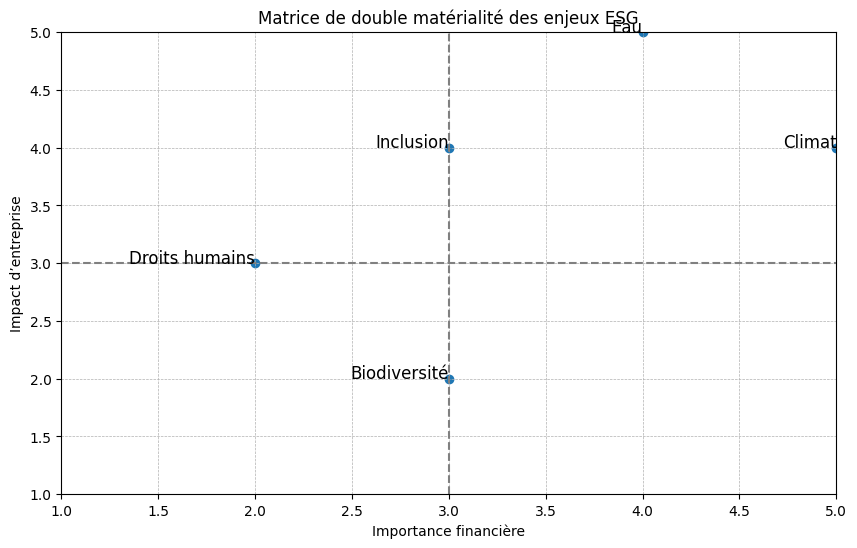

In [39]:
download_and_display_agent_images(response, client)

## Création d'un workflow agentique

Lors de la création et de l’utilisation d’agents, souvent équipés d'outils spécifiques, il arrive qu’on souhaite faire appel à d’autres agents en cours d’action. Pour concevoir et structurer des workflows automatisés couvrant une variété de tâches, cette capacité à déléguer des tâches à d’autres agents ou à leur transférer une conversation s’appelle un Handoff (transfert).

### Création des agents

In [40]:
from mistralai import CompletionArgs, ResponseFormat, JSONSchema

token = os.environ.get("MISTRAL_API_KEY")
client = Mistral(api_key=token)

class CalcResult(BaseModel):
    reasoning: str
     # JSON list of { year, value, meets_target }
    result: str

# Create your agents
calculator_agent = client.beta.agents.create(
    model="mistral-large-latest",
    name="calculator-agent",
    description="Agent used to make detailed calculations",
    instructions=r"""When doing calculations explain step by step what you are doing.
    #### Compound annual reduction rate (CARR)
    To calculate the compounded effect of reducing a quantity over time to reach a target value, you can use the formula for compound annual reduction:

    \[ r = 1 - \left( \frac{T}{B} \right)^{\frac{1}{n}} \]

    where:
    - \( r \) is the annual reduction rate (as a decimal, e.g., 0.043 for 4.3%).
    - \( B \) is the baseline value (initial quantity, e.g., emissions in year 0).
    - \( T \) is the target value (final quantity after n years).
    - \( n \) is the number of years over which the reduction occurs.""",
    completion_args=CompletionArgs(
          response_format=ResponseFormat(
            type="json_schema",
            json_schema=JSONSchema(
                name="calc_result",
                schema=CalcResult.model_json_schema(),
            )
        )
    )
)



In [42]:
# – Lookup interne esg baseline : metric + date + sector, retourne [{baseline, target, unit, yearBaseline, yearTarget, source, comment}, ...]
esg_baseline_agent = client.beta.agents.create(
    model="mistral-large-latest",
    name="esg-baseline-agent",
    description="Can find the current baseline and target of the EU taxonomy by sector and year in Europe",
    tools=[{
        "type": "function",
        "function": {
            "name": "get_esg_baseline",
            "description": "Returns the baseline of an ESG indicator (for example 'carbon_intensity' or 'water_usage') for a sector and a target year.",
            "parameters": {
                "type": "object",
                "properties": {
                    "metric": {"type": "string"},
                    "sector": {"type": "string"},
                    "date":   {"type": "string"}
                },
                "required": ["metric", "sector", "date"]
            }
        }
    }]
)

## Définir les responsabilités lors des transferts (handoff) entre agents

Une fois tous nos agents créés, nous mettons à jour les agents définis précédemment avec la liste des handoffs disponibles (transferts possibles vers d'autres agents).

In [64]:
# Allow the esg_agent to handoff the conversation to the esg_baseline_agent or web_search_agent
client.beta.agents.update(
    agent_id=esg_agent.id, 
    handoffs=[esg_baseline_agent.id, web_search_agent.id]
)


# Allow the ecb_interest_rate_agent to handoff the conversation to the graph_agent or calculator_agent
client.beta.agents.update(
    # instructions="""
    #     If the user asks for calculations, you may hand off to the calculator agent.
    #     If the user asks to plot, visualize, or graph anything hand off the task to the graph-drawing agent.
    #     You have access to both calculator-agent and graph-drawing-agent via handoffs.
    #     """,
    agent_id=esg_baseline_agent.id, 
    handoffs=[calculator_agent.id, graph_agent.id]
)


# Allow the web_search_agent to handoff the conversation to the graph_agent or calculator_agent
client.beta.agents.update(
    agent_id=web_search_agent.id, 
    # instructions="""
    #     If the user asks for calculations, you may hand off to the calculator agent.
    #     If the user asks to plot, visualize, or graph anything hand off the task to the graph-drawing agent.
    #     You have access to both calculator-agent and graph-drawing-agent via handoffs.
    #     """,
    handoffs=[calculator_agent.id, graph_agent.id]
)


Agent(model='mistral-large-latest', name='websearch-agent', id='ag_06836d8350137612800050f05187a144', version=3, created_at=datetime.datetime(2025, 5, 28, 9, 32, 37, 11713, tzinfo=TzInfo(UTC)), updated_at=datetime.datetime(2025, 5, 28, 10, 18, 14, 644036, tzinfo=TzInfo(UTC)), instructions=None, tools=[WebSearchTool(type='web_search')], completion_args=CompletionArgs(stop=None, presence_penalty=None, frequency_penalty=None, temperature=0.3, top_p=None, max_tokens=None, random_seed=None, prediction=None, response_format=None, tool_choice='auto'), description='Agent that can search online for any information if needed', handoffs=['ag_06836df6b13d7d82800018fad1a41338', 'ag_06836dd547f27b5b80006d7cb78cbbab'], object='agent')

### Comment ça fonctionne

Notre workflow et le comportement des agents sont désormais définis, nous pouvons donc l’exécuter.

Nous avons créé 5 agents. Certains ont accès à des outils intégrés, d'autres à des outils locaux comme `get_esg_baseline`.

Il est maintenant possible d’enchaîner plusieurs actions en envoyant une requête à `esg_agent`.

Déclenchons deux comportements différents à titre d’exemple :


#### Exemple A

**"Fetch the current US bank interest rate and calculate the compounded effect if investing for the next 10y"**

*("Récupère le taux directeur actuel de la banque centrale américaine et calcule l'effet des intérêts composés sur un investissement sur les 10 prochaines années")*

Dans ce premier exemple, on demande le taux directeur de la banque centrale des États-Unis. On s’attend donc à ce que l’agent de recherche web (websearch-agent) intervienne, suivi du calcul des intérêts composés sur 10 ans. Cette opération sera effectuée par l’agent calculateur (calculator-agent).

In [44]:
response = client.beta.conversations.start(
    agent_id=esg_agent.id,
    inputs="What are the current carbon emission levels and 2030 reduction targets for the steel industries in China?"
)   
pretty_print_agent_response(response)


ID de la conversation : conv_06836dfe771e75c980009d0f66584115

Transfert d'agent (Handoff) :
  De : esg-agent
  Vers : websearch-agent
  Date : 2025-05-28 10:05:28.064974+00:00

Exécution d'outil :
  Outil : web_search
  Début : 2025-05-28 10:05:30.396383+00:00
  Fin : 2025-05-28 10:05:32.142771+00:00
  ID : tool_exec_06836dfea657763f80009e9b8d0432b3

Exécution d'outil :
  Outil : web_search
  Début : 2025-05-28 10:05:32.514637+00:00
  Fin : 2025-05-28 10:05:33.861097+00:00
  ID : tool_exec_06836dfec83b7b5b800025fedea28e8f

Réponse finale de l'agent :
  As of 2025, China's steel industry is a significant contributor to the country's carbon emissions, accounting for approximately 15% of the total. The industry has set ambitious targets to reduce these emissions. By 2030, the steel sector aims to decrease its carbon emissions by 30% compared to its peak levels. This reduction is part of a broader national goal to establish a modern industrial system characterized by high efficiency, gre

In [60]:
response = client.beta.conversations.start(
    agent_id=esg_agent.id,
    inputs="The carbon intensity of EU steel production was 1.8 tCO₂/tonne in 2018. The target for 2030 is 1.2 tCO₂/tonne." 
    "Calculate the compound annual reduction rate over this 12-year period."
)   



In [61]:
pretty_print_agent_response(response)


ID de la conversation : conv_06836e25e504792b800063f9c12c508b

Réponse finale de l'agent :
  To calculate the compound annual reduction rate (CARR) over the 12-year period from 2018 to 2030, we can use the formula for compound annual growth rate (CAGR), but adapted for reduction:

CARR = (End Value / Start Value)^(1/n) - 1

where:
- End Value = 1.2 tCO₂/tonne (target for 2030)
- Start Value = 1.8 tCO₂/tonne (value for 2018)
- n = number of years (2030 - 2018 = 12)

Plugging in the values:

CARR = (1.2 / 1.8)^(1/12) - 1

CARR = (0.6667)^(1/12) - 1

CARR ≈ 0.9609 - 1

CARR ≈ -0.0391 or -3.91%

The compound annual reduction rate over the 12-year period is approximately 3.91%.



In [65]:
from mistralai import FunctionResultEntry
import json

response = client.beta.conversations.start(
    agent_id=esg_agent.id,
    inputs="""Given the carbon intensity target in tCO2e/tonne for EU in the steel industry in 2030,
      plot a graph of the compound annual reduction rate (CARR) over the next 10 years."""
)

# Supposons que tu as déjà la variable `response` issue de la requête initiale
if response.outputs[-1].type == "function.call" and response.outputs[-1].name == "get_esg_baseline":
    # On récupère les arguments de la fonction appelée
    args = response.outputs[-1].arguments
    if isinstance(args, str):
        args = json.loads(args)  # Désérialisation si c'est une chaîne
    metric = args.get("metric", "")

    if metric == "carbon_intensity":
        result = {
            "baseline": 1.8,
            "target": 1.2,
            "unit": "tCO2e/tonne",
            "yearBaseline": 2018,
            "yearTarget": 2030,
            "source": "EUROFER",
            "comment": "Average EU steel production target"
        }
    elif metric == "water_usage":
        result = {
            "baseline": 2400,
            "target": 1900,
            "unit": "m3/hectare/year",
            "yearBaseline": 2015,
            "yearTarget": 2030,
            "source": "European Environment Agency",
            "comment": "Target for average agricultural water use per hectare in EU"
        }
    else:
        result = {"error": "Metric non supporté"}

    user_entry = FunctionResultEntry(
        tool_call_id=response.outputs[-1].tool_call_id,
        result=json.dumps(result),  # On sérialise en JSON si besoin
    )
    print("\033[1mRésultat de la fonction :\033[0m")
    print(user_entry)
    response = client.beta.conversations.append(
        conversation_id=response.conversation_id,
        inputs=[user_entry]
    )

    print(response)

conversation_id='conv_06836e308c5e7aca800042f5282232d4' outputs=[AgentHandoffEntry(previous_agent_id='ag_06836dfd059c71e98000c7d0371043c3', previous_agent_name='esg-baseline-agent', next_agent_id='ag_06836df6b13d7d82800018fad1a41338', next_agent_name='calculator-agent', object='entry', type='agent.handoff', created_at=datetime.datetime(2025, 5, 28, 10, 18, 57, 180867, tzinfo=TzInfo(UTC)), completed_at=datetime.datetime(2025, 5, 28, 10, 18, 59, 898974, tzinfo=TzInfo(UTC)), id='handoff_06836e3112e47ac58000a38ec22a1344'), MessageOutputEntry(content=' {\n  "result": "0.03",\n  "reasoning": "To calculate the compound annual reduction rate (CARR), we use the formula:\\n\\n  r = 1 - (T / B)^(1 / n)\\n\\nGiven:\\n- B (baseline value) = 1.8 tCO2e/tonne\\n- T (target value) = 1.2 tCO2e/tonne\\n- n (number of years) = 12 years (from 2018 to 2030)\\n\\nFirst, calculate the ratio T / B:\\n\\n  T / B = 1.2 / 1.8 = 0.6667\\n\\nNext, calculate the exponent (1 / n):\\n\\n  1 / n = 1 / 12 ≈ 0.0833\\n\\n

In [66]:
pretty_print_agent_response(response)


ID de la conversation : conv_06836e308c5e7aca800042f5282232d4

Transfert d'agent (Handoff) :
  De : esg-baseline-agent
  Vers : calculator-agent
  Date : 2025-05-28 10:18:57.180867+00:00

Réponse finale de l'agent :
  {
  "result": "0.03",
  "reasoning": "To calculate the compound annual reduction rate (CARR), we use the formula:\n\n  r = 1 - (T / B)^(1 / n)\n\nGiven:\n- B (baseline value) = 1.8 tCO2e/tonne\n- T (target value) = 1.2 tCO2e/tonne\n- n (number of years) = 12 years (from 2018 to 2030)\n\nFirst, calculate the ratio T / B:\n\n  T / B = 1.2 / 1.8 = 0.6667\n\nNext, calculate the exponent (1 / n):\n\n  1 / n = 1 / 12 ≈ 0.0833\n\nNow, raise the ratio to the power of the exponent:\n\n  (0.6667)^(0.0833) ≈ 0.9705\n\nFinally, calculate the CARR:\n\n  r = 1 - 0.9705 = 0.0295 or 2.95%\n\nSo, the compound annual reduction rate is approximately 0.03 or 3%."
}



In [51]:
download_and_display_agent_images(response, client)

### Append to conversation

In [ ]:
response = client.beta.conversations.append(
    conversation_id=response.conversation_id, inputs="You didn't plot the graph."
)
pretty_print_agent_response(response)

response = client.beta.conversations.append(
    conversation_id=response.conversation_id, inputs="And then you should handoff to the calculator-agent."
)
pretty_print_agent_response(response)

response = client.beta.conversations.append(
    conversation_id=response.conversation_id, inputs="You still have to plot the graph. You should call the graph-drawing-agent."
)
pretty_print_agent_response(response)